In [1]:
#====================================
# Lecutre CNN - Part 1
# Joshuah Touyz
#====================================

In [2]:
%pylab inline

import copy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.datasets import mnist, cifar10
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten, Reshape
from keras.optimizers import SGD, RMSprop
from keras.utils import np_utils
from keras.regularizers import l2
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D, AveragePooling2D
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization

from PIL import Image

Populating the interactive namespace from numpy and matplotlib


c:\users\munol\appdata\local\programs\python\python35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
# =============================
#  Reshaping data
# ============================
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28,1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28,1).astype('float32') / 255
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [4]:
# =============================
#  Setting up LeNet Architecture
# ============================
model = Sequential()

model.add(Conv2D(filters = 32,kernel_size=(3, 3), 
                 activation='relu', strides=(1, 1), 
                 padding='valid', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters = 32,kernel_size=(3, 3), 
                 activation='relu', strides=(1, 1), 
                 padding='valid', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters = 32,kernel_size=(3, 3), 
                 activation='relu', strides=(1, 1), 
                 padding='valid', input_shape=(28,28,1)))

model.add(Flatten())
model.add(Dense(84))
model.add(Dense(10))
model.add(Activation('softmax'))

In [5]:
# =============================
#  Training the model
# ============================
l_rate = 1
sgd = SGD(lr=l_rate, momentum=0.0, decay=0.0, nesterov=False)
# model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy']) -takes a long time to converge
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=4,
          verbose=2, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
 - 111s - loss: 0.2353 - acc: 0.9257 - val_loss: 0.0554 - val_acc: 0.9824
Epoch 2/4
 - 123s - loss: 0.0911 - acc: 0.9720 - val_loss: 0.0409 - val_acc: 0.9866
Epoch 3/4
 - 110s - loss: 0.0723 - acc: 0.9768 - val_loss: 0.0375 - val_acc: 0.9868
Epoch 4/4
 - 110s - loss: 0.0622 - acc: 0.9808 - val_loss: 0.0292 - val_acc: 0.9898


In [6]:
print("Test classification rate %0.05f" % model.evaluate(X_test, Y_test)[1])

10000/10000 [==============================] - 6s 627us/step
Test classification rate 0.98980


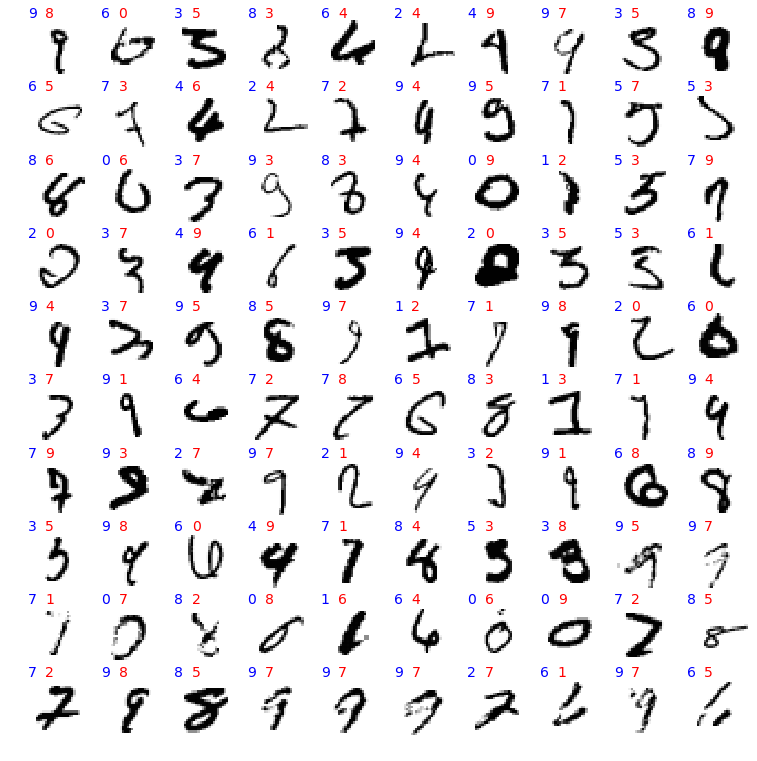

In [7]:
y_hat = model.predict_classes(X_test)
test_wrong = [im for im in zip(X_test,y_hat,y_test) if im[1] != im[2]]

plt.figure(figsize=(10, 10))
for ind, val in enumerate(test_wrong[:100]):
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    plt.subplot(10, 10, ind + 1)
    im = 1 - val[0].reshape((28,28))
    plt.axis("off")
    plt.text(0, 0, val[2], fontsize=14, color='blue')
    plt.text(8, 0, val[1], fontsize=14, color='red')
    plt.imshow(im, cmap='gray')

In [8]:
# =============================
#  Distrorting inputs
# ============================
# Goal is to amplify the signal
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=25,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images



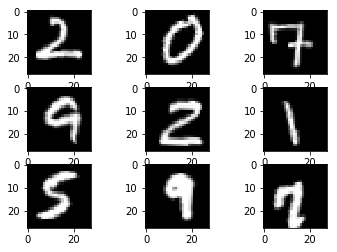

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [9]:
# =====================================
# Looking at batches of images created
# =====================================
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, np_utils.to_categorical(y_train), batch_size=9):
    # create a grid of 3x3 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
    # show the plot
    pyplot.show()
    print(y_batch)
    break

In [10]:
# =====================
# Augmenting the data 
# ====================
# For more examples see: https://blog.novatec-gmbh.de/keras-data-augmentation-for-cnn/
train_generator_n_samples = datagen.flow(X_train, np_utils.to_categorical(y_train), batch_size=64, seed = 1)

In [11]:
# =============================
#  Training the model
# ============================
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model.fit_generator(train_generator_n_samples, 
                    verbose=1, 
                    nb_epoch = 2,
                    steps_per_epoch = 60000//64)

c:\users\munol\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:8: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
c:\users\munol\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., verbose=1, steps_per_epoch=937, epochs=2)`
  


Epoch 1/2
937/937 [==============================] - 103s 110ms/step - loss: 0.2291 - acc: 0.9278
Epoch 2/2
937/937 [==============================] - 101s 107ms/step - loss: 0.1619 - acc: 0.9489s - loss: 0.1619 


In [12]:
print("Test classification rate %0.05f" % model.evaluate(X_test, Y_test)[1])

10000/10000 [==============================] - 2s 213us/step
Test classification rate 0.98870


In [14]:
# =============================
# Pre-packaged Models
# ============================
# For more detail see here : https://keras.io/applications/
# from keras.applications import ResNet50
# from keras.applications import InceptionV3
# from keras.applications.inception_v3 import preprocess_input
# from keras.applications import VGG19
# from keras.applications import Xception # TensorFlow ONLY

# =============================
#  Loading libraries
# ============================
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
import numpy as np

# Load image
img_path = 'pics/tiger.jpg'

<figure>
    <img src="./Pictures/tiger.jpg" />
    <center>
    <caption>Image of tiger we are looking to classify</caption>
    </center>
</figure>

In [15]:
# Loading image
img = image.load_img(img_path, target_size=(224, 224))
model = VGG16(weights="imagenet", include_top=True)

# Turning into matrix
x = image.img_to_array(img)
print("The dimensions of the image are {}".format(x.shape))

# Turning matrix into a tensor
x = np.expand_dims(x, axis=0)
print("The tensor dims of the image are {}".format(x.shape))

553467904/553467096 [==============================] - 301s 1us/step
The dimensions of the image are (224, 224, 3)
The tensor dims of the image are (1, 224, 224, 3)


In [16]:
# -- Step required for model to consume image --
x = preprocess_input(x)

In [17]:
# --- Predicted the values for x ----
preds = model.predict(x)
# Predicted value
top_3 = ["Prediction: "+ pred + ", w/ prob " + str(np.round(prob,25))
         for _,pred, prob in decode_predictions(preds, top=3)[0]]
print('\n'.join(top_3))

40960/35363 [==================================] - 0s 2us/step
Prediction: tiger, w/ prob 0.8049105
Prediction: tiger_cat, w/ prob 0.19491619
Prediction: leopard, w/ prob 6.4208005e-05
